# *SOURCE*
https://www.youtube.com/watch?v=doDUihpj6ro&t=7339s
https://github.com/nicknochnack/ActionDetectionforSignLanguage


## **PREPARATION**

In [1]:
! pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [4]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('/content/Tutorial_LSTM_MP/Face_data') 

# Actions that we try to detect
actions = np.array(['HadapKanan', 'HadapKiri', 'HadapDepan'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [5]:
! git clone https://github.com/nickbp760/Tutorial_LSTM_MP.git

fatal: destination path 'Tutorial_LSTM_MP' already exists and is not an empty directory.


The label map containts the action label

In [6]:
label_map = {label:num for num, label in enumerate(actions)}

load the the data that have been prepared before

In [7]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [8]:
X = np.array(sequences)
print(X.shape)
y = to_categorical(labels).astype(int)
print(y.shape)

(90, 30, 1404)
(90, 3)


1404 is an amount of features in one frame, 30 is an amount frames for one video action, 90 is an amount of 
video actions

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    

In [11]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

## **Build and Train Neural Network**

### Default GRU 256 - 128 - 64


In [12]:
model = Sequential()
model.add(GRU(256, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 5s 710ms/step - loss: 1.0048 - categorical_accuracy: 0.4568 - val_loss: 0.6382 - val_categorical_accuracy: 0.6667
Epoch 2/250
3/3 [==============================] - 1s 522ms/step - loss: 0.5369 - categorical_accuracy: 0.7531 - val_loss: 0.2604 - val_categorical_accuracy: 1.0000
Epoch 3/250
3/3 [==============================] - 2s 734ms/step - loss: 0.1561 - categorical_accuracy: 1.0000 - val_loss: 0.0350 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 2s 508ms/step - loss: 0.0248 - categorical_accuracy: 1.0000 - val_loss: 0.0054 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 1s 478ms/step - loss: 0.0038 - categorical_accuracy: 1.0000 - val_loss: 0.0016 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 1s 445ms/step - loss: 9.0129e-04 - categorical_accuracy: 1.0000 - val_loss: 3.0312e-04 - val_categorical_accuracy: 1.0000
Ep

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 256)           1276416   
                                                                 
 gru_1 (GRU)                 (None, 30, 128)           148224    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,468,227
Trainable params: 1,468,227
Non-

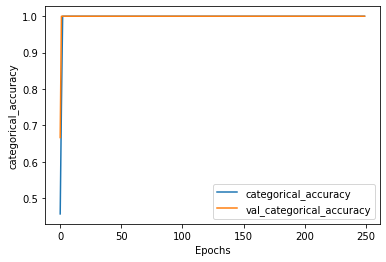

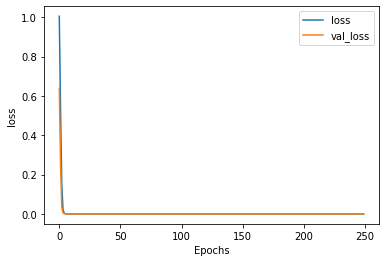

In [13]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default GRU 128

In [14]:
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(GRU(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 471ms/step - loss: 1.1704 - categorical_accuracy: 0.1481 - val_loss: 0.7317 - val_categorical_accuracy: 0.7778
Epoch 2/250
3/3 [==============================] - 1s 200ms/step - loss: 0.5172 - categorical_accuracy: 0.9877 - val_loss: 0.2025 - val_categorical_accuracy: 1.0000
Epoch 3/250
3/3 [==============================] - 1s 490ms/step - loss: 0.1197 - categorical_accuracy: 1.0000 - val_loss: 0.0283 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 1s 499ms/step - loss: 0.0217 - categorical_accuracy: 1.0000 - val_loss: 0.0036 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 2s 632ms/step - loss: 0.0024 - categorical_accuracy: 1.0000 - val_loss: 3.0332e-04 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 2s 554ms/step - loss: 2.3772e-04 - categorical_accuracy: 1.0000 - val_loss: 3.9205e-05 - val_categorical_accuracy: 1.000

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 30, 128)           589056    
                                                                 
 gru_4 (GRU)                 (None, 30, 128)           99072     
                                                                 
 gru_5 (GRU)                 (None, 128)               99072     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 797,635
Trainable params: 797,635
Non-tr

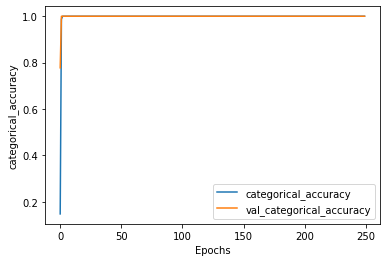

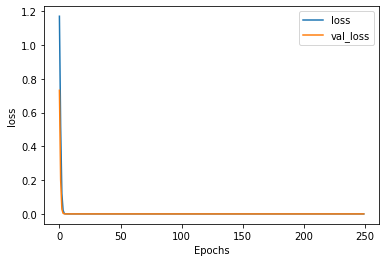

In [15]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default GRU 128 - 64(3)

In [16]:
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 586ms/step - loss: 1.1143 - categorical_accuracy: 0.3580 - val_loss: 0.8046 - val_categorical_accuracy: 0.8889
Epoch 2/250
3/3 [==============================] - 1s 433ms/step - loss: 0.7566 - categorical_accuracy: 0.8519 - val_loss: 0.5192 - val_categorical_accuracy: 1.0000
Epoch 3/250
3/3 [==============================] - 1s 430ms/step - loss: 0.4093 - categorical_accuracy: 1.0000 - val_loss: 0.2538 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 1s 460ms/step - loss: 0.1964 - categorical_accuracy: 1.0000 - val_loss: 0.1046 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 1s 498ms/step - loss: 0.0682 - categorical_accuracy: 1.0000 - val_loss: 0.0244 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 1s 235ms/step - loss: 0.0173 - categorical_accuracy: 1.0000 - val_loss: 0.0040 - val_categorical_accuracy: 1.0000
Epoch 7/25

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 30, 128)           589056    
                                                                 
 gru_7 (GRU)                 (None, 30, 128)           99072     
                                                                 
 gru_8 (GRU)                 (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 731,715
Trainable params: 731,715
Non-tr

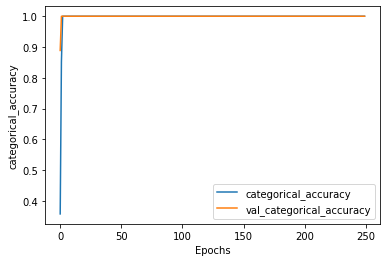

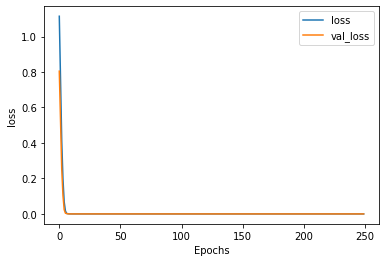

In [17]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default GRU 128(1) - 64

In [18]:
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(64, return_sequences=True, activation='relu'))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 5s 415ms/step - loss: 1.1570 - categorical_accuracy: 0.3210 - val_loss: 0.9377 - val_categorical_accuracy: 0.5556
Epoch 2/250
3/3 [==============================] - 1s 239ms/step - loss: 0.8984 - categorical_accuracy: 0.5802 - val_loss: 0.7184 - val_categorical_accuracy: 0.7778
Epoch 3/250
3/3 [==============================] - 1s 212ms/step - loss: 0.5632 - categorical_accuracy: 0.9506 - val_loss: 0.2933 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 1s 200ms/step - loss: 0.2630 - categorical_accuracy: 1.0000 - val_loss: 0.1163 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 1s 207ms/step - loss: 0.0917 - categorical_accuracy: 0.9877 - val_loss: 0.0178 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 1s 219ms/step - loss: 0.0168 - categorical_accuracy: 1.0000 - val_loss: 0.0037 - val_categorical_accuracy: 1.0000
Epoch 7/25

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 30, 128)           589056    
                                                                 
 gru_10 (GRU)                (None, 30, 64)            37248     
                                                                 
 gru_11 (GRU)                (None, 64)                24960     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 657,603
Trainable params: 657,603
Non-tr

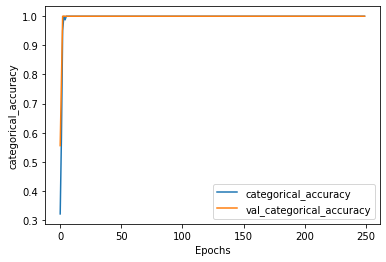

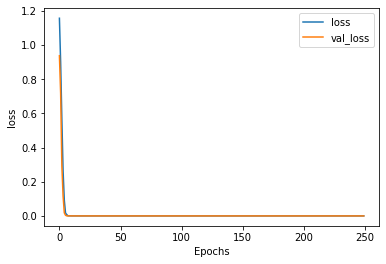

In [19]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default GRU 64 - 128(2) - 64


In [20]:
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 6s 428ms/step - loss: 0.9277 - categorical_accuracy: 0.5556 - val_loss: 0.5163 - val_categorical_accuracy: 1.0000
Epoch 2/250
3/3 [==============================] - 1s 210ms/step - loss: 0.3650 - categorical_accuracy: 1.0000 - val_loss: 0.1219 - val_categorical_accuracy: 1.0000
Epoch 3/250
3/3 [==============================] - 1s 197ms/step - loss: 0.0987 - categorical_accuracy: 1.0000 - val_loss: 0.0397 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 1s 205ms/step - loss: 0.0226 - categorical_accuracy: 1.0000 - val_loss: 0.0047 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 1s 204ms/step - loss: 0.0029 - categorical_accuracy: 1.0000 - val_loss: 0.0011 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 1s 207ms/step - loss: 6.4902e-04 - categorical_accuracy: 1.0000 - val_loss: 4.3918e-04 - val_categorical_accuracy: 1.0000
Ep

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 30, 64)            282240    
                                                                 
 gru_13 (GRU)                (None, 30, 128)           74496     
                                                                 
 gru_14 (GRU)                (None, 64)                37248     
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 400,323
Trainable params: 400,323
Non-tr

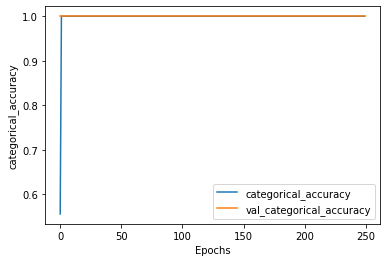

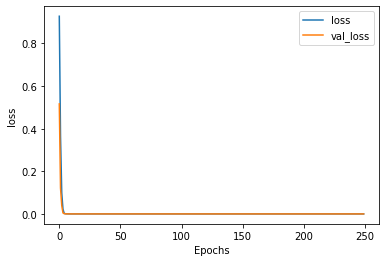

In [21]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default GRU 64

In [22]:
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(64, return_sequences=True, activation='relu'))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 422ms/step - loss: 1.1697 - categorical_accuracy: 0.4568 - val_loss: 1.0328 - val_categorical_accuracy: 0.5556
Epoch 2/250
3/3 [==============================] - 1s 208ms/step - loss: 0.8794 - categorical_accuracy: 0.7654 - val_loss: 0.6281 - val_categorical_accuracy: 1.0000
Epoch 3/250
3/3 [==============================] - 1s 218ms/step - loss: 0.5427 - categorical_accuracy: 1.0000 - val_loss: 0.3397 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 1s 216ms/step - loss: 0.2475 - categorical_accuracy: 1.0000 - val_loss: 0.1128 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 1s 217ms/step - loss: 0.0696 - categorical_accuracy: 1.0000 - val_loss: 0.0295 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 1s 198ms/step - loss: 0.0173 - categorical_accuracy: 1.0000 - val_loss: 0.0055 - val_categorical_accuracy: 1.0000
Epoch 7/25

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 30, 64)            282240    
                                                                 
 gru_16 (GRU)                (None, 30, 64)            24960     
                                                                 
 gru_17 (GRU)                (None, 64)                24960     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 338,499
Trainable params: 338,499
Non-tr

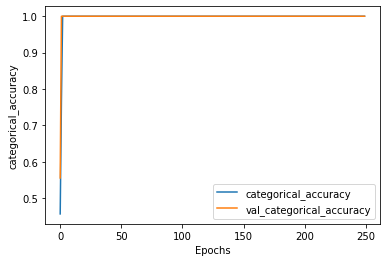

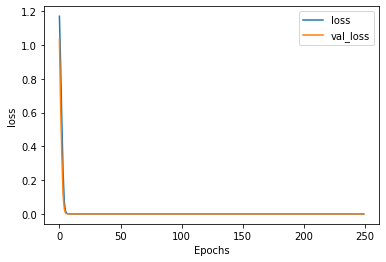

In [23]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default GRU 64 - 128(3)

In [24]:
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(64, return_sequences=True, activation='relu'))
model.add(GRU(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 604ms/step - loss: 1.1488 - categorical_accuracy: 0.1728 - val_loss: 0.9720 - val_categorical_accuracy: 0.5556
Epoch 2/250
3/3 [==============================] - 1s 231ms/step - loss: 0.8367 - categorical_accuracy: 0.6790 - val_loss: 0.6675 - val_categorical_accuracy: 1.0000
Epoch 3/250
3/3 [==============================] - 1s 241ms/step - loss: 0.5048 - categorical_accuracy: 1.0000 - val_loss: 0.3668 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 1s 199ms/step - loss: 0.2389 - categorical_accuracy: 0.9877 - val_loss: 0.1207 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 1s 401ms/step - loss: 0.0737 - categorical_accuracy: 1.0000 - val_loss: 0.0296 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 1s 442ms/step - loss: 0.0171 - categorical_accuracy: 1.0000 - val_loss: 0.0061 - val_categorical_accuracy: 1.0000
Epoch 7/25

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 30, 64)            282240    
                                                                 
 gru_19 (GRU)                (None, 30, 64)            24960     
                                                                 
 gru_20 (GRU)                (None, 128)               74496     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 392,131
Trainable params: 392,131
Non-tr

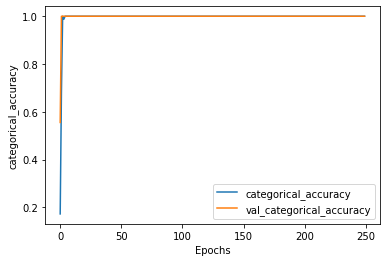

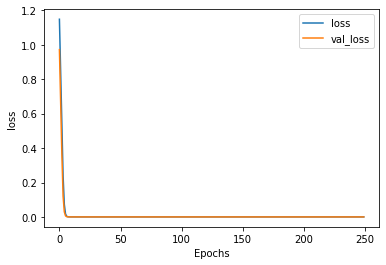

In [25]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default GRU 64(1) - 128

In [26]:
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(GRU(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 4s 423ms/step - loss: 1.0561 - categorical_accuracy: 0.4444 - val_loss: 0.8976 - val_categorical_accuracy: 0.5556
Epoch 2/250
3/3 [==============================] - 1s 202ms/step - loss: 0.6914 - categorical_accuracy: 0.8642 - val_loss: 0.4100 - val_categorical_accuracy: 1.0000
Epoch 3/250
3/3 [==============================] - 1s 227ms/step - loss: 0.3195 - categorical_accuracy: 1.0000 - val_loss: 0.1588 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 1s 410ms/step - loss: 0.1024 - categorical_accuracy: 1.0000 - val_loss: 0.0274 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 1s 480ms/step - loss: 0.0164 - categorical_accuracy: 1.0000 - val_loss: 0.0037 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 1s 507ms/step - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 0.0018 - val_categorical_accuracy: 1.0000
Epoch 7/25

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_21 (GRU)                (None, 30, 64)            282240    
                                                                 
 gru_22 (GRU)                (None, 30, 128)           74496     
                                                                 
 gru_23 (GRU)                (None, 128)               99072     
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 466,243
Trainable params: 466,243
Non-tr

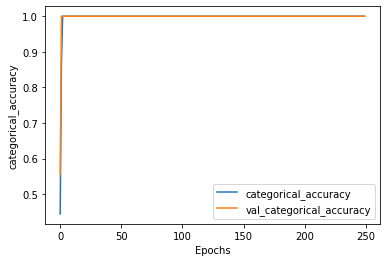

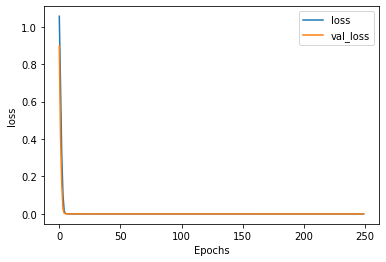

In [27]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')

### Default GRU 128 - 64(2) - 128


In [28]:
model = Sequential()
model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,1404)))
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# model.optimizer.lr.assign(0.1)
history = model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback], validation_data = (X_test, y_test))

Epoch 1/250
3/3 [==============================] - 7s 966ms/step - loss: 1.4137 - categorical_accuracy: 0.3333 - val_loss: 1.1787 - val_categorical_accuracy: 0.3333
Epoch 2/250
3/3 [==============================] - 2s 600ms/step - loss: 1.0448 - categorical_accuracy: 0.5062 - val_loss: 0.9405 - val_categorical_accuracy: 0.5556
Epoch 3/250
3/3 [==============================] - 1s 469ms/step - loss: 0.7553 - categorical_accuracy: 0.7284 - val_loss: 0.6021 - val_categorical_accuracy: 1.0000
Epoch 4/250
3/3 [==============================] - 1s 265ms/step - loss: 0.4477 - categorical_accuracy: 1.0000 - val_loss: 0.3049 - val_categorical_accuracy: 1.0000
Epoch 5/250
3/3 [==============================] - 1s 236ms/step - loss: 0.2165 - categorical_accuracy: 1.0000 - val_loss: 0.1017 - val_categorical_accuracy: 1.0000
Epoch 6/250
3/3 [==============================] - 1s 248ms/step - loss: 0.0672 - categorical_accuracy: 1.0000 - val_loss: 0.0229 - val_categorical_accuracy: 1.0000
Epoch 7/25

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_24 (GRU)                (None, 30, 64)            282240    
                                                                 
 gru_25 (GRU)                (None, 30, 128)           74496     
                                                                 
 gru_26 (GRU)                (None, 64)                37248     
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 3)                 99        
                                                                 
Total params: 400,323
Trainable params: 400,323
Non-tr

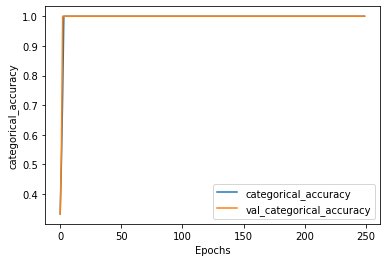

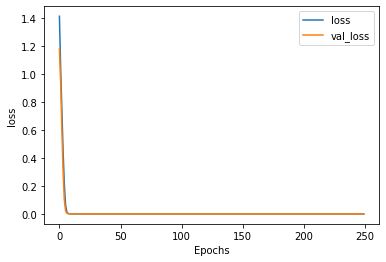

In [29]:
model.summary()
model.save('/content/Tutorial_LSTM_MP/Weight_model/actionFaceDefaultGRU.h5')
plot_graphs(history, 'categorical_accuracy')
plot_graphs(history, 'loss')